# EDA

In [45]:
import os
import re

import pandas as pd
import numpy as np
import math
from functions import *

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix

from imblearn.over_sampling import SMOTE

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 

import matplotlib.pyplot as plt

## Load Data

In [86]:
# function to load most shared articles for eda
def load_most_shared_eda(dir_path):
#     'data/most_popular'
    directory = os.fsencode(dir_path)
    
    files = []
    most_shared_df = pd.DataFrame()
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        exclude = 'before'
        if filename.endswith('.csv') and exclude not in filename :
            files.append(filename)
            
    #read them into pandas
    df_list = [pd.read_csv(dir_path+'/'+file) for file in files]
    
    return df_list

In [87]:
# fucntion to clean most shared articles for eda
def clean_most_shared_eda(df_list):
    
    for df in df_list:
        df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())
        df.date_sourced = df.date_sourced.apply(lambda x: pd.to_datetime(x).date())
        df.set_index('date_sourced', inplace=True)
        df.sort_index(ascending=False, inplace=True)
        
    return df_list
    

In [97]:
def plot_most_shared(list_df):
    
    size = len(list_df)
    cols = round(math.sqrt(size))
    rows = cols
    while rows * cols < size:
        rows += 1
    f, ax_arr = plt.subplots(rows, cols)
    plt.rcParams["figure.figsize"] = (20,20)
    ax_arr = ax_arr.reshape(-1)
    for i in range(len(ax_arr)):
        if i >= size:
            ax_arr[i].axis('off')
            break

        list_df[i].groupby('date_published').count().plot(kind='bar', 
                                                          title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                          rot=50, xlabel='Date Published', 
                                                          ylabel='Number of Articles', ax=ax_arr[i]);
        ax_arr[i].legend(['Articles'])
        
    # plt.subplot_tool();

In [98]:
df_list_load = load_most_shared_eda('data/most_popular_train')
df_list = clean_most_shared_eda(df_list_load)

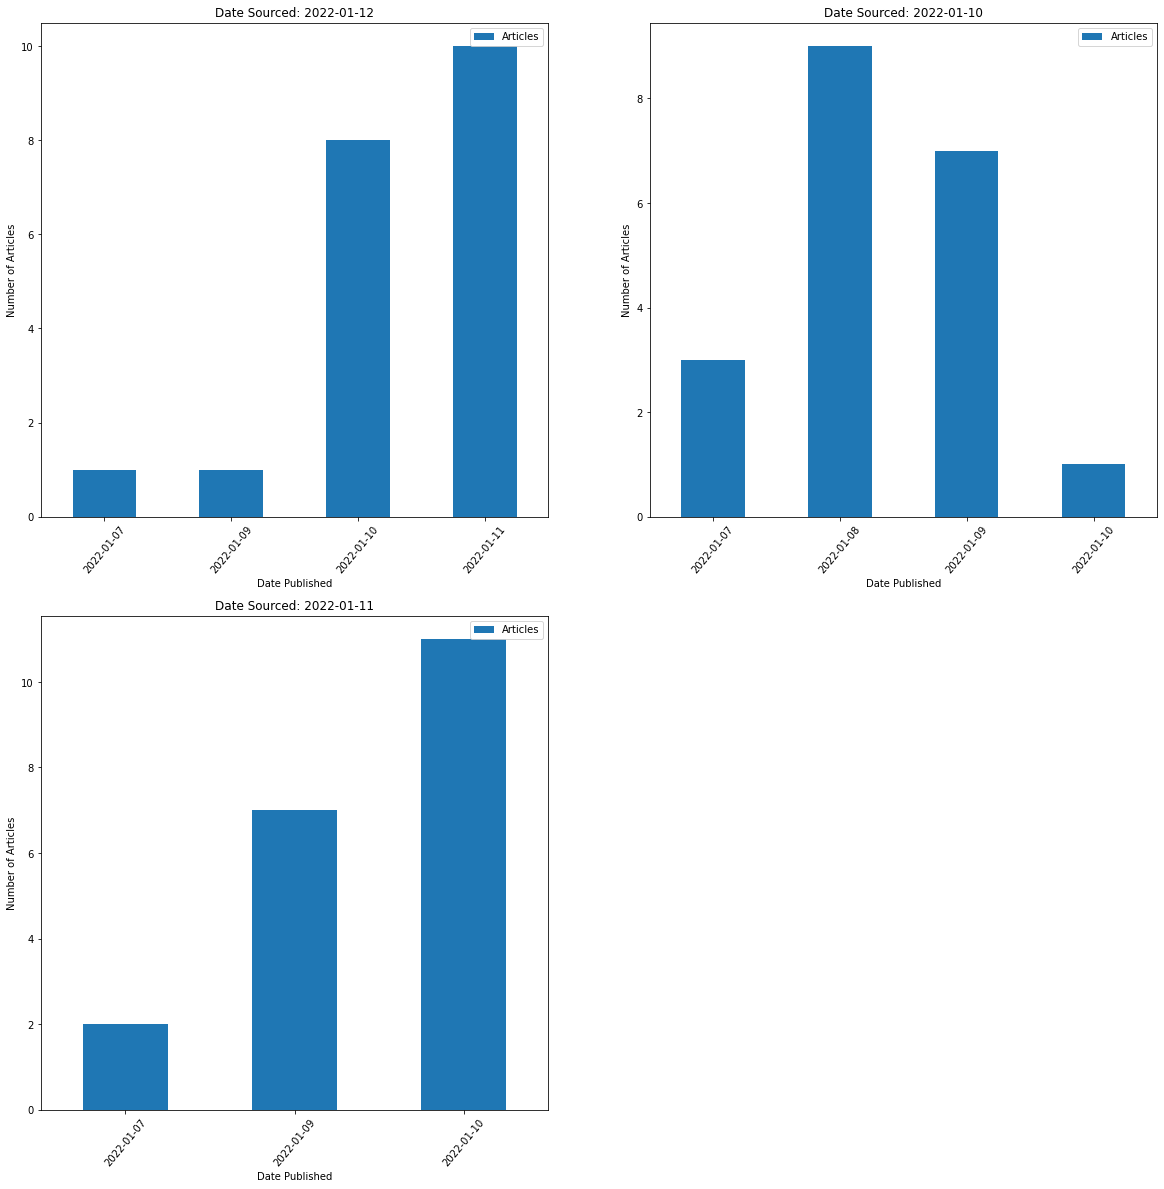

In [99]:
plot_most_shared(df_list)

In [78]:
len(df_list)

3

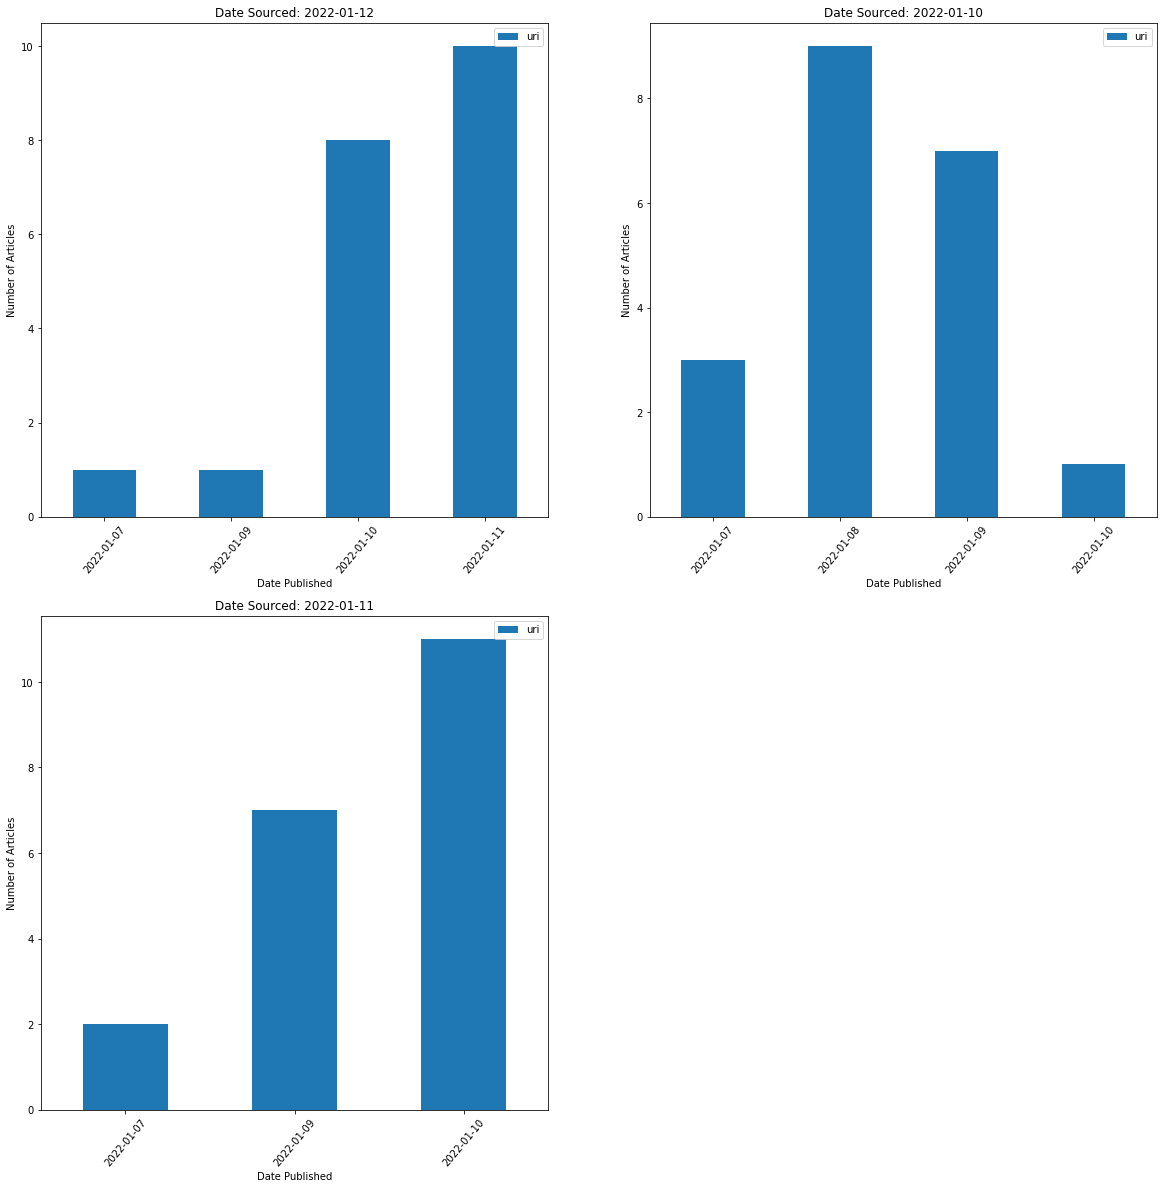

In [81]:
size = len(df_list)
cols = round(math.sqrt(size))
rows = cols
while rows * cols < size:
    rows += 1
f, ax_arr = plt.subplots(rows, cols)
plt.rcParams["figure.figsize"] = (20,20)
ax_arr = ax_arr.reshape(-1)
for i in range(len(ax_arr)):
    if i >= size:
        ax_arr[i].axis('off')
        break
        
    df_list[i].groupby('date_published').count().plot(kind='bar', 
                                                      title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                      rot=50, xlabel='Date Published', 
                                                      ylabel='Number of Articles', ax=ax_arr[i]);
# plt.subplot_tool();

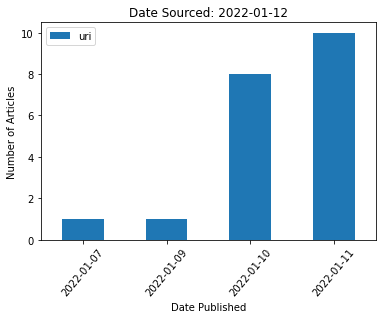

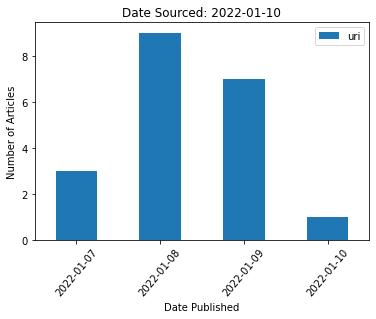

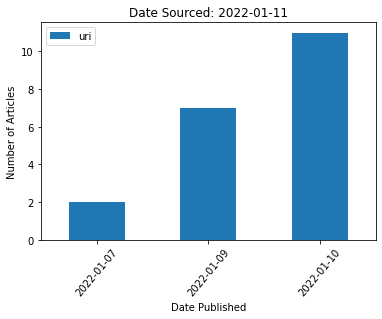

In [43]:
for i in range(len(df_list)):
    df_list[i].groupby('date_published').count().plot(kind='bar', title=f'Date Sourced: {str(df_list[i].index[0])}',
                                                 rot=50, xlabel='Date Published', ylabel='Number of Articles');

In [2]:
df = pd.read_csv('data/archive_train.csv')
df.dropna(inplace=True)

df_most_shared = load_most_shared('data/most_popular_train')
df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())

In [3]:
popular_list = df_most_shared.uri.values
df['popular'] = [1 if x in popular_list else 0 for x in df['uri']]

In [4]:
df.head()

,uri,date_published,headline,keywords,snippet,word_count,popular
0,nyt://article/4e2abcbc-9563-56c0-bf18-c93ce4e7...,2021-12-01,let’s end the covid blame games,coronavirus omicron variantcoronavirus (2019-n...,"Finger pointing is pointless, divisive and dumb.",918,0
1,nyt://article/f7a5e7ef-e4cd-575c-a0e1-ff4d18d5...,2021-12-01,trump’s iran policy has become a disaster for ...,irannuclear weaponsembargoes and sanctionsunit...,Withdrawing from the Iran nuclear deal was a m...,1560,0
2,nyt://article/778af86c-b600-5aeb-be98-0a9a1aa1...,2021-12-01,this extinct eagle may have gulped guts like a...,eagles (birds)vultures (birds)condorsendangere...,Scientists suggest the largest eagle that ever...,913,0
3,nyt://article/fb7763c2-0f41-5c81-9ecf-17607ba5...,2021-12-01,republican recriminations point to a rocky pat...,republican partyhouse of representativesboeber...,Simmering tensions between the far-right flank...,1172,0
4,nyt://article/ba0afd37-0c00-5535-8868-21130e28...,2021-12-01,a times editor who attended oxford recalls a d...,school shootings and armed attacks,Three teenage students were killed on Tuesday ...,309,0


In [6]:
df.date_published[0]

datetime.date(2021, 12, 1)

In [7]:
df_most_shared.head()

,uri,date_published
date_sourced,,
2022-01-12,nyt://article/a7e37b1f-5900-5e4a-97bf-7c5491e7...,2022-01-11
2022-01-12,nyt://article/9b5ce161-0850-5592-918d-c25496a0...,2022-01-10
2022-01-12,nyt://article/909189f6-dcf1-5b75-89b8-a91be8e4...,2022-01-10
2022-01-12,nyt://article/9c68de54-1f52-5e92-9b28-67c728a3...,2022-01-11
2022-01-12,nyt://article/8e22bd8b-eaaf-5f38-a29f-9315e074...,2022-01-11


In [9]:
df_most_shared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 2022-01-12 to 2022-01-10
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uri             80 non-null     object
 1   date_published  80 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [11]:
df_most_shared.uri.value_counts()

nyt://article/52071637-5bea-5870-a222-5634605c3db9    3
nyt://article/8401ee1b-25f2-51cc-b388-ad37d759dbf7    3
nyt://article/960bacd2-8e63-5abc-9fbc-d124e34bb00c    3
nyt://article/642b4860-875d-51c6-be7b-1a2d253bb7c1    2
nyt://article/14cffef1-8737-5510-ad47-7e5e06c81515    2
                                                     ..
nyt://article/9713a586-e612-5cb8-a352-c9b153298e1c    1
nyt://article/cfadc565-e2f9-558b-9e45-267761891be3    1
nyt://article/1999a6d0-8284-5636-8db9-970ee60854f0    1
nyt://article/1bd4a75b-24f5-5db9-91f4-632f7284cd64    1
nyt://article/26c2d3b7-87e2-5ddd-9ef1-a045c13e6c50    1
Name: uri, Length: 67, dtype: int64

In [13]:
eda_df = df_most_shared.groupby(df_most_shared.index).sum()
eda_df

,uri
date_sourced,
2022-01-10,nyt://article/642b4860-875d-51c6-be7b-1a2d253b...
2022-01-11,nyt://article/642b4860-875d-51c6-be7b-1a2d253b...
2022-01-12,nyt://article/a7e37b1f-5900-5e4a-97bf-7c5491e7...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2022-01-12 to 2022-01-10
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uri             60 non-null     object
 1   date_published  60 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [40]:
df.

,uri,date_published
date_sourced,,
2022-01-12,nyt://article/a7e37b1f-5900-5e4a-97bf-7c5491e7...,2022-01-11
2022-01-12,nyt://article/4f2a59ca-9606-5157-860b-4a316786...,2022-01-11
2022-01-12,nyt://article/9b5ce161-0850-5592-918d-c25496a0...,2022-01-10
2022-01-12,nyt://article/118ced58-5264-599d-9d1c-3e3141c5...,2022-01-11
2022-01-12,nyt://article/ea6213a7-ccfa-51e1-9b11-c5a25c76...,2022-01-11
2022-01-12,nyt://article/cf4e845e-9c92-5051-a8cf-4d88c9e0...,2022-01-10
2022-01-12,nyt://article/8401ee1b-25f2-51cc-b388-ad37d759...,2022-01-10
2022-01-12,nyt://article/1999a6d0-8284-5636-8db9-970ee608...,2022-01-10
2022-01-12,nyt://article/52071637-5bea-5870-a222-5634605c...,2022-01-07


In [69]:
df.plot(figsize = (22,8))
plt.show()

TypeError: no numeric data to plot

In [64]:
test = df.groupby(['date_sourced', 'date_published']).sum()

In [65]:
test.index

MultiIndex([(2022-01-10, 2022-01-07),
            (2022-01-10, 2022-01-08),
            (2022-01-10, 2022-01-09),
            (2022-01-10, 2022-01-10),
            (2022-01-11, 2022-01-07),
            (2022-01-11, 2022-01-09),
            (2022-01-11, 2022-01-10),
            (2022-01-12, 2022-01-07),
            (2022-01-12, 2022-01-09),
            (2022-01-12, 2022-01-10),
            (2022-01-12, 2022-01-11)],
           names=['date_sourced', 'date_published'])

In [66]:
test.unstack()

uri  \
date_published                                         2022-01-07   
date_sourced                                                        
2022-01-10      nyt://article/88a11aee-de77-51fd-97cb-adc9eadd...   
2022-01-11      nyt://article/52071637-5bea-5870-a222-5634605c...   
2022-01-12      nyt://article/52071637-5bea-5870-a222-5634605c...   

                                                                   \
date_published                                         2022-01-08   
date_sourced                                                        
2022-01-10      nyt://article/8bdd5a79-f372-53b1-be12-3ff2c3c8...   
2022-01-11                                                    NaN   
2022-01-12                                                    NaN   

                                                                   \
date_published                                         2022-01-09   
date_sourced                                                        
2022-01-10      nyt://article/642b4860-875d-51c6-be7b-1a2d253b...   
2022-01-11      nyt://article/26c2d3b7-87e2-5ddd-9ef1-a045c13e...   
2022-01-12      nyt://article/960bacd2-8e63-5abc-9fbc-d124e34b...   

                                                                   \
date_published                                         2022-01-10   
date_sourced                                                        
2022-01-10      nyt://article/8401ee1b-25f2-51cc-b388-ad37d759...   
2022-01-11      nyt://article/8e35ae0e-1d32-552a-a040-0800ed8f...   
2022-01-12      nyt://article/9b5ce161-0850-5592-918d-c25496a0...   

                                                                   
date_published                                         2022-01-11  
date_sourced                                                       
2022-01-10                                                    NaN  
2022-01-11                                                    NaN  
2022-01-12      nyt://article/a7e37b1f-5900-5e4a-97bf-7c5491e7...

In [68]:
test.groupby('date_published').sum()

,uri
date_published,
2022-01-07,nyt://article/88a11aee-de77-51fd-97cb-adc9eadd...
2022-01-08,nyt://article/8bdd5a79-f372-53b1-be12-3ff2c3c8...
2022-01-09,nyt://article/642b4860-875d-51c6-be7b-1a2d253b...
2022-01-10,nyt://article/8401ee1b-25f2-51cc-b388-ad37d759...
2022-01-11,nyt://article/a7e37b1f-5900-5e4a-97bf-7c5491e7...
